In [1]:
import nilearn
from nilearn import datasets

In [2]:
dataset = datasets.fetch_abide_pcp(data_dir='data/', n_subjects=10)

/home/marinbenc/miniconda3/envs/pytorch/lib/python3.8/site-packages/nilearn/datasets/func.py:1020: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


In [4]:
len(dataset.func_preproc)

10

In [5]:
parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
atlas_filename = parcellations.scale444


Dataset created in /home/marinbenc/nilearn_data/basc_multiscale_2015



 ...done. (1 seconds, 0 min)
Extracting data from /home/marinbenc/nilearn_data/basc_multiscale_2015/53337d5c408465aa257d35f81c13413b/1861819..... done.


/home/marinbenc/miniconda3/envs/pytorch/lib/python3.8/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


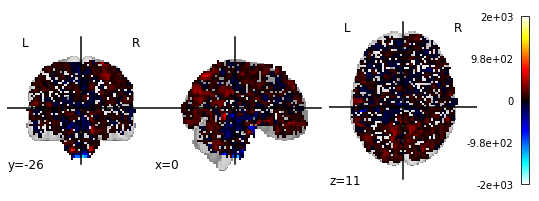

In [7]:
fmri_filenames = dataset.func_preproc[0]
fmri_filenames
from nilearn import plotting
from nilearn import image
first_Img = image.index_img(fmri_filenames, 1)
plotting.plot_stat_map(first_Img, threshold = 'auto')

In [11]:
from nilearn.input_data import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=atlas_filename, 
                           standardize=True, 
                           memory='nilearn_cache', 
                           verbose=1)

time_series = masker.fit_transform(fmri_filenames, confounds=dataset.confounds[0])

AttributeError: confounds

In [9]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]
correlation_matrix.shape

(444, 444)

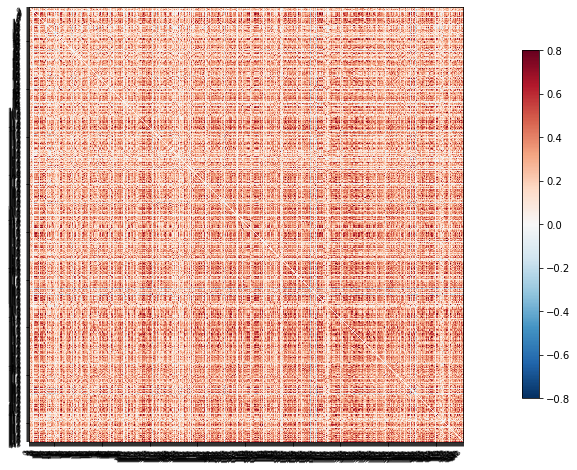

In [12]:
import numpy as np

#np.fill_diagonal(correlation_matrix, 0)

plotting.plot_matrix(correlation_matrix, figure=(10, 8),   
                     labels=range(time_series.shape[-1]),
                     vmax=0.8, vmin=-0.8, reorder=False)